In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import os
os.chdir('../')
os.getcwd()

'c:\\Users\\jfsal\\Documents\\TFTDataProject'

In [3]:
unit_data = pd.read_csv('data/unitperformancedata.csv')
unit_data[['Games on Patch', 'Percent Appearance']] = unit_data['Frequency'].str.split(' ', expand=True)
unit_data['Percent Appearance'] = unit_data['Percent Appearance'].str.rstrip('%').astype(float)
unit_data['Win Rate'] = unit_data['Win Rate'].str.rstrip('%').astype(float)
unit_data['Games on Patch'] = unit_data['Games on Patch'].str.replace(',', '').astype(int)
unit_data = unit_data.drop(columns=['Frequency'])
unit_data = unit_data.dropna()
unit_data.head()

,Unit,Average Place,Win Rate,Games on Patch,Percent Appearance
0,Warwick,3.05,26.1,174548,8.3
1,Mel,3.06,26.8,144021,6.9
2,Viktor,3.08,25.2,219146,10.4
3,LeBlanc,3.78,18.7,343418,16.4
4,Caitlyn,3.83,17.5,300951,14.3


In [ ]:
data = pd.read_csv('data/Set_13Units.csv')
data.drop_duplicates(inplace=True)
data.head()
data['Set'] = data['Set'].fillna(13)
data['Cost'] = data['Cost'].fillna('0')
merged_data = pd.merge(unit_data, data, on='Unit', how='left')
unit_data = merged_data
merged_data = merged_data.sort_values(by='Cost')
merged_data.head()

,Unit,Average Place,Win Rate,Games on Patch,Percent Appearance,Set,Cost,Type,Traits
29,Maddie,4.45,14.1,264671,12.6,13.0,1.0,ADCaster,"Enforcer, Sniper"
26,Irelia,4.42,12.5,373180,17.8,13.0,1.0,APTank,"Rebel, Sentinel"
28,Steb,4.43,14.0,262366,12.5,13.0,1.0,APTank,"Enforcer, Bruiser"
57,Violet,4.73,10.0,104262,5.0,13.0,1.0,ADFighter,"Family, Pit Fighter"
42,Powder,4.56,12.1,350952,16.7,13.0,1.0,APCasterHighMana,"Family, Scrap, Ambusher"


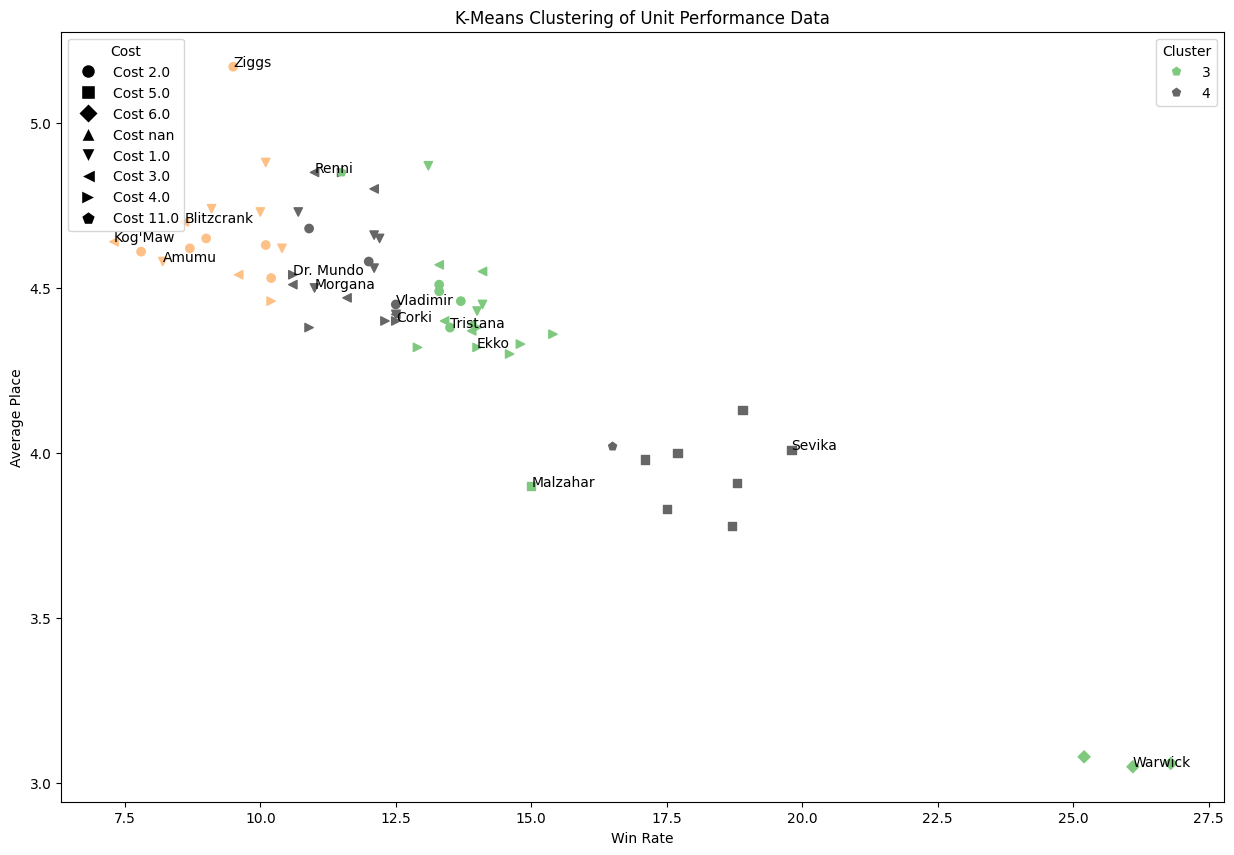

In [8]:
features = unit_data[['Average Place', 'Win Rate']]
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters = 5, random_state = 22)
unit_data['Cluster'] = kmeans.fit_predict(features)

# Define markers for different costs
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'd', '|', '_']

# Plot the clustering results with a larger figure size and different markers for costs
plt.figure(figsize=(15, 10))
for cost, marker in zip(sorted(unit_data['Cost'].unique()), markers):
    subset = unit_data[unit_data['Cost'] == cost]
    scatter = plt.scatter(subset['Win Rate'], subset['Average Place'], c=subset['Cluster'], cmap='Accent', marker=marker, label=f'Cost {cost}')

# Add legend for clusters
handles, labels = scatter.legend_elements(prop="colors")
legend1 = plt.legend(handles, labels, title="Cluster", loc="upper right")
plt.gca().add_artist(legend1)

# Manually create legend for costs
cost_handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='black', markersize=10, label=f'Cost {cost}') for cost, marker in zip(sorted(unit_data['Cost'].unique()), markers)]
plt.legend(handles=cost_handles, title="Cost", loc="upper left")

# Add labels for a few units
for i, unit in unit_data.iterrows():
    if i % 5 == 0:  # Adjust this condition to label more or fewer points
        plt.annotate(unit['Unit'], (unit['Win Rate'], unit['Average Place']))

plt.xlabel('Win Rate')
plt.ylabel('Average Place')
plt.title('K-Means Clustering of Unit Performance Data')
plt.show()
